In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
raw_full = pd.read_pickle('data/trainset_full.pkl') #dataset without missing values
data_full = pd.DataFrame(raw_full)
data_full = data_full.drop('index',axis=1)

raw = pd.read_pickle('data/trainset.pkl') #dataset with missing values
data = pd.DataFrame(raw)
data = data.drop('index',axis=1)

In [136]:
data['measured_at'] = pd.to_datetime(data['measured_at'])

In [3]:
data.isnull().sum()

turbine_id                 0
measured_at                0
wind_speed            101176
power                  58136
nacelle_direction          0
wind_direction             0
rotor_speed            96922
generator_speed        98536
temp_environment       71404
temp_hydraulic_oil     71558
temp_gear_bearing      70575
cosphi                     0
blade_angle_avg       187489
hydraulic_pressure         0
park_id                    0
error_category             0
dtype: int64

In [4]:
data.nunique(axis=0)

turbine_id                13
measured_at           122516
wind_speed               422
power                  52613
nacelle_direction       5285
wind_direction          5285
rotor_speed              283
generator_speed        14494
temp_environment          53
temp_hydraulic_oil        76
temp_gear_bearing         81
cosphi                   111
blade_angle_avg         1715
hydraulic_pressure      1116
park_id                    2
error_category            18
dtype: int64

In [5]:
data.head()

turbine_id                measured_at  wind_speed    power  \
0          11  2020-01-01 00:00:00+00:00    0.433333  0.12125   
1          11  2020-01-01 00:10:00+00:00    0.458333  0.13875   
2          11  2020-01-01 00:20:00+00:00    0.508333  0.18295   
3          11  2020-01-01 00:30:00+00:00       0.525   0.2181   
4          11  2020-01-01 00:40:00+00:00    0.541667   0.2343   

   nacelle_direction  wind_direction  rotor_speed  generator_speed  \
0              266.0           266.3     0.677852         0.569444   
1              266.6           267.0     0.704698         0.591766   
2              270.7           269.4     0.771812         0.647321   
3              272.1           272.7     0.805369         0.676091   
4              279.5           281.1     0.832215         0.700397   

   temp_environment  temp_hydraulic_oil  temp_gear_bearing  cosphi  \
0                 5                  20                 32    0.85   
1                 5                  20                 33    0.88   
2                 5                  20                 34    0.92   
3                 5                  20                 38    0.94   
4                 5                  20                 41    0.95   

   blade_angle_avg  hydraulic_pressure  park_id error_category  
0             -1.9               189.2        1       NO_ERROR  
1             <NA>               189.5        1       NO_ERROR  
2             -2.0               190.1        1       NO_ERROR  
3             -2.0               190.0        1       NO_ERROR  
4             -2.0               189.9        1       NO_ERROR

In [ ]:
# outlier detection

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367190 entries, 0 to 1367189
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   turbine_id          1367190 non-null  Int64  
 1   measured_at         1367190 non-null  string 
 2   wind_speed          1266014 non-null  Float64
 3   power               1309054 non-null  Float64
 4   nacelle_direction   1367190 non-null  Float64
 5   wind_direction      1367190 non-null  Float64
 6   rotor_speed         1270268 non-null  Float64
 7   generator_speed     1268654 non-null  Float64
 8   temp_environment    1295786 non-null  Int64  
 9   temp_hydraulic_oil  1295632 non-null  Int64  
 10  temp_gear_bearing   1296615 non-null  Int64  
 11  cosphi              1367190 non-null  Float64
 12  blade_angle_avg     1179701 non-null  Float64
 13  hydraulic_pressure  1367190 non-null  Float64
 14  park_id             1367190 non-null  Int64  
 15  error_category 

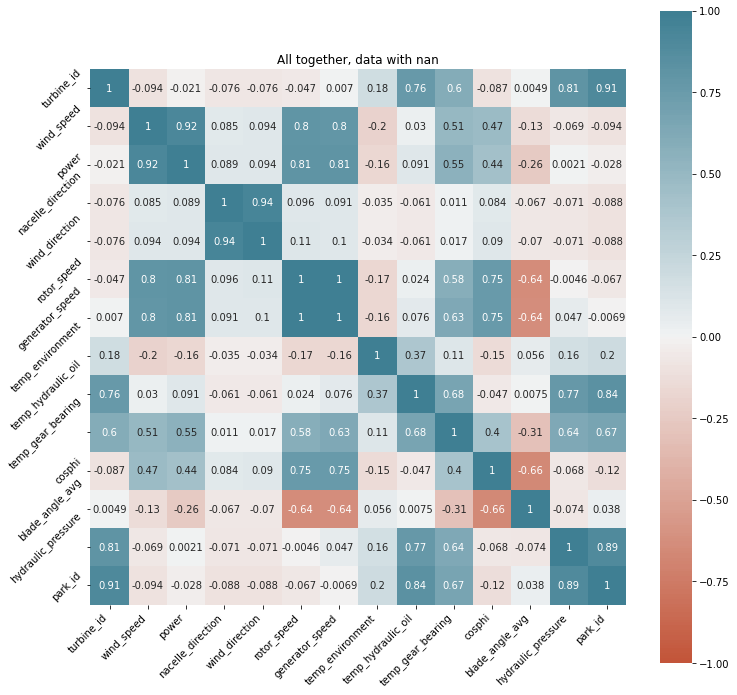

In [8]:
plt.figure(figsize=(12,12))
plt.title('All together, data with nan')
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
);

In [9]:
# make plot for park seperated and for windturbine seperated TODO

corr_df = data[data.columns.difference(['turbine_id','error_category','measured_at','park_id'])]
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367190 entries, 0 to 1367189
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   blade_angle_avg     1179701 non-null  Float64
 1   cosphi              1367190 non-null  Float64
 2   generator_speed     1268654 non-null  Float64
 3   hydraulic_pressure  1367190 non-null  Float64
 4   nacelle_direction   1367190 non-null  Float64
 5   power               1309054 non-null  Float64
 6   rotor_speed         1270268 non-null  Float64
 7   temp_environment    1295786 non-null  Int64  
 8   temp_gear_bearing   1296615 non-null  Int64  
 9   temp_hydraulic_oil  1295632 non-null  Int64  
 10  wind_direction      1367190 non-null  Float64
 11  wind_speed          1266014 non-null  Float64
dtypes: Float64(9), Int64(3)
memory usage: 140.8 MB


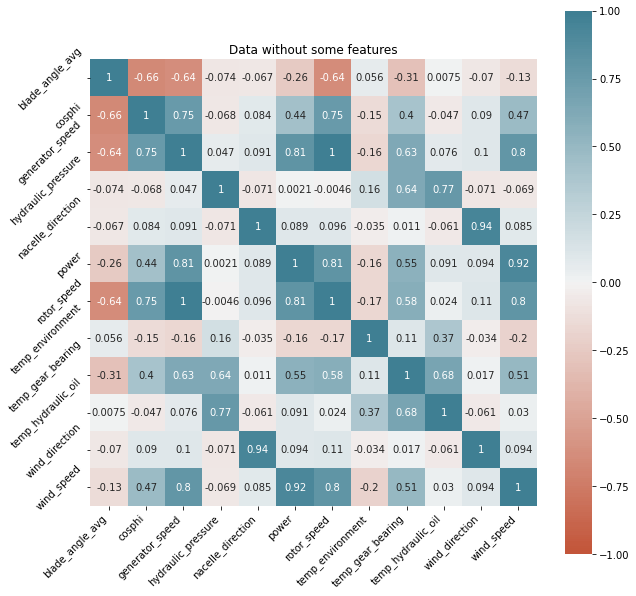

In [10]:
# use this plot to exclude irrelevant features, like wind speed vs. power
plt.figure(figsize=(10,10))
plt.title('Data without some features')
corr = corr_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=45,
);

In [11]:
# figure out the error type 
data_with_errors = data.loc[data['error_category']!='NO_ERROR']
data_with_errors.head()

turbine_id                measured_at  wind_speed    power  \
428          11  2020-01-03 23:20:00+00:00    1.091667   0.9872   
429          11  2020-01-03 23:30:00+00:00    1.016667   0.9316   
430          11  2020-01-03 23:40:00+00:00    1.041667  0.98145   
497          11  2020-01-04 10:50:00+00:00    1.041667  0.99645   
498          11  2020-01-04 11:00:00+00:00         1.1   0.9977   

     nacelle_direction  wind_direction  rotor_speed  generator_speed  \
428              305.8           307.7     0.993289         0.833333   
429              308.6           311.0     0.993289         0.832837   
430              313.5           316.0     0.993289         0.833829   
497              247.6           243.7         <NA>         0.833333   
498              244.0           242.8         <NA>         0.833829   

     temp_environment  temp_hydraulic_oil  temp_gear_bearing  cosphi  \
428                 8                  39                 56    0.99   
429                 7                  40                 56    0.99   
430                 7                  41                 57    0.99   
497                 6                  33                 51    0.99   
498                 6                  34                 51    0.99   

     blade_angle_avg  hydraulic_pressure  park_id error_category  
428              6.5               195.8        1        ERROR=5  
429              4.5               196.1        1        ERROR=5  
430              4.6               196.0        1        ERROR=5  
497              6.1               196.0        1        ERROR=5  
498              7.0               196.1        1        ERROR=5

In [12]:
data_with_errors.error_category.unique()

<StringArray>
[ 'ERROR=5', 'ERROR=22',  'ERROR=7',  'ERROR=3', 'ERROR=24', 'ERROR=19',
  'ERROR=8', 'ERROR=20', 'ERROR=28', 'ERROR=31', 'ERROR=27', 'ERROR=23',
 'ERROR=29', 'ERROR=12', 'ERROR=30', 'ERROR=17', 'ERROR=25']
Length: 17, dtype: string

In [13]:
corr_df = data[data.columns.difference(['turbine_id','error_category','measured_at','park_id'])]
# seperate heatmap by error and no error
data_noerror = corr_df.loc[data['error_category']=='NO_ERROR']
data_error = corr_df.loc[data['error_category']!='NO_ERROR']
# here we don't care about the windpark, that will follow later on

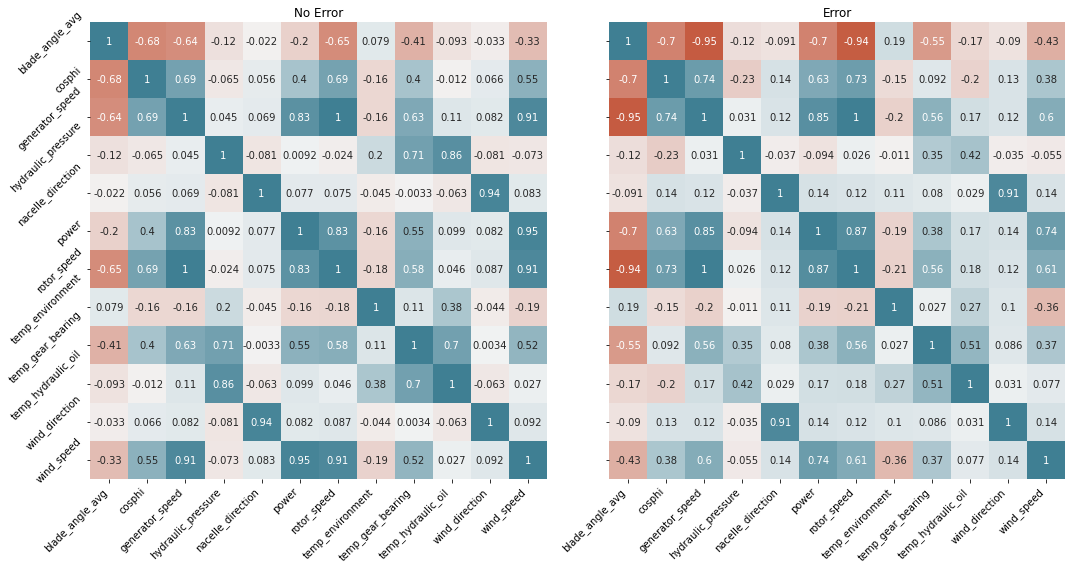

In [14]:
fig, axs = plt.subplots(1,2,figsize=(15,12),sharex=True, sharey=True)

# NO ERROR
sns.heatmap(data=data_noerror.corr(), ax=axs[0],
            cbar=None,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True, annot=True)
axs[0].set_title('No Error')
axs[0].set_xticklabels(
    axs[0].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
axs[0].set_yticklabels(
    axs[0].get_yticklabels(),
    rotation=45,
);

# WITH ERROR
sns.heatmap(data=data_error.corr(), ax=axs[1],
            cbar=None,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True, annot=True)
axs[1].set_title('Error')
axs[1].set_xticklabels(
    axs[1].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
fig.tight_layout()

In [15]:
data.head()

turbine_id                measured_at  wind_speed    power  \
0          11  2020-01-01 00:00:00+00:00    0.433333  0.12125   
1          11  2020-01-01 00:10:00+00:00    0.458333  0.13875   
2          11  2020-01-01 00:20:00+00:00    0.508333  0.18295   
3          11  2020-01-01 00:30:00+00:00       0.525   0.2181   
4          11  2020-01-01 00:40:00+00:00    0.541667   0.2343   

   nacelle_direction  wind_direction  rotor_speed  generator_speed  \
0              266.0           266.3     0.677852         0.569444   
1              266.6           267.0     0.704698         0.591766   
2              270.7           269.4     0.771812         0.647321   
3              272.1           272.7     0.805369         0.676091   
4              279.5           281.1     0.832215         0.700397   

   temp_environment  temp_hydraulic_oil  temp_gear_bearing  cosphi  \
0                 5                  20                 32    0.85   
1                 5                  20                 33    0.88   
2                 5                  20                 34    0.92   
3                 5                  20                 38    0.94   
4                 5                  20                 41    0.95   

   blade_angle_avg  hydraulic_pressure  park_id error_category  
0             -1.9               189.2        1       NO_ERROR  
1             <NA>               189.5        1       NO_ERROR  
2             -2.0               190.1        1       NO_ERROR  
3             -2.0               190.0        1       NO_ERROR  
4             -2.0               189.9        1       NO_ERROR

In [51]:
corr_df = data[data.columns.difference(['turbine_id','error_category','measured_at'])]
# seperate heatmap by error and no error
data_noerror = corr_df.loc[data['error_category']=='NO_ERROR']
data_error = corr_df.loc[data['error_category']!='NO_ERROR']
# here we don't care about the windpark, that will follow later on

In [36]:
# #convert error_cat to logical values
# data_logical_err = data
# # data_logical_err.loc[data_logical_err['error_category']=='NO_ERROR'] = 0


# data_logical_err.loc[data_logical_err['error_category']=='NO_ERROR']

In [71]:
data_park1 = data.loc[data['park_id']==1]
data_park1 = data_park1[data_park1.columns.difference(['turbine_id','measured_at','park_id'])]

data_park2 = data.loc[data['park_id']==2]
data_park2 = data_park2[data_park2.columns.difference(['turbine_id','measured_at','park_id'])]

In [72]:
data_park1_noerr = data_park1.loc[data_park1['error_category']=='NO_ERROR']
data_park1_err = data_park1.loc[data_park1['error_category']!='NO_ERROR']
# data_park1.loc[data_park1['error_category']=='NO_ERROR', 'error_category'] = 0

data_park2_noerr = data_park2.loc[data_park2['error_category']=='NO_ERROR']
data_park2_err = data_park2.loc[data_park2['error_category']!='NO_ERROR']

In [ ]:
park1_turbine0 = 

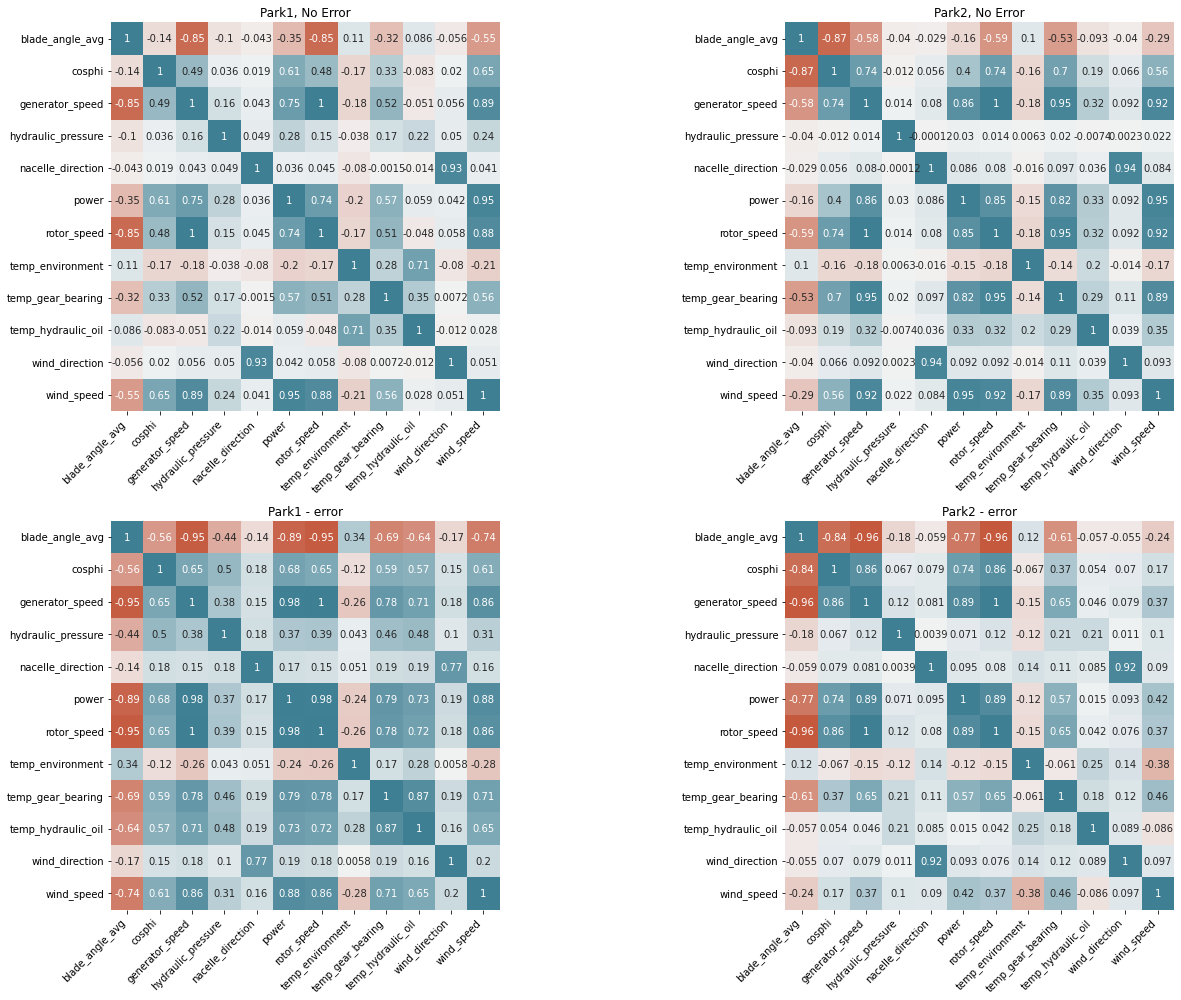

In [73]:
fig, axs = plt.subplots(2,2,figsize=(20,14),sharex=False, sharey=False)

# Park1, no error
sns.heatmap(data=data_park1_noerr.corr(), ax=axs[0,0],
            cbar=None,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True, annot=True)
axs[0,0].set_xticklabels(
    axs[0,0].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
axs[0,0].set_yticklabels(
    axs[0,0].get_yticklabels(),
    # rotation=45,
)
axs[0,0].set_title('Park1, No Error')

# park1, error
sns.heatmap(data=data_park1_err.corr(), ax=axs[1,0],
            cbar=None,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True, annot=True)
axs[1,0].set_xticklabels(
    axs[1,0].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
axs[1,0].set_title('Park1 - error')




# Park2, no error
sns.heatmap(data=data_park2_noerr.corr(), ax=axs[0,1],
            cbar=None,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True, annot=True)
axs[0,1].set_xticklabels(
    axs[0,1].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
axs[0,1].set_yticklabels(
    axs[0,1].get_yticklabels(),
    # rotation=45,
)
axs[0,1].set_title('Park2, No Error')


# park2, error
sns.heatmap(data=data_park2_err.corr(), ax=axs[1,1],
            cbar=None,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True, annot=True)
axs[1,1].set_xticklabels(
    axs[1,1].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
axs[1,1].set_title('Park2 - error')


fig.tight_layout()

<AxesSubplot:xlabel='measured_at'>

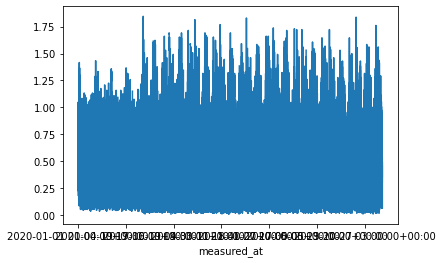

In [70]:
# data.query('turbine_id == 12').query('measured_at <= "2020-01-05 00:00:00+00:00"').set_index('measured_at').wind_speed.plot()
# data.query('turbine_id == 0').query('measured_at <= "2019-01-05 00:00:00+00:00"').set_index('measured_at').wind_speed.plot()
data.query('turbine_id == 0').set_index('measured_at').wind_speed.plot()

In [149]:
data.query('turbine_id == 0').set_index('measured_at').wind_speed.plot()

ValueError: values must be a 1D array

In [87]:
time = data['measured_at']
time

0         2020-01-01 00:00:00+00:00
1         2020-01-01 00:10:00+00:00
2         2020-01-01 00:20:00+00:00
3         2020-01-01 00:30:00+00:00
4         2020-01-01 00:40:00+00:00
                     ...           
1367185   2021-04-30 22:10:00+00:00
1367186   2021-04-30 22:20:00+00:00
1367187   2021-04-30 22:30:00+00:00
1367188   2021-04-30 22:40:00+00:00
1367189   2021-04-30 22:50:00+00:00
Name: measured_at, Length: 1367190, dtype: datetime64[ns, UTC]

In [88]:
windspeed = data['wind_speed']
windspeed

0          0.433333
1          0.458333
2          0.508333
3             0.525
4          0.541667
             ...   
1367185    0.253846
1367186    0.261538
1367187    0.261538
1367188    0.307692
1367189    0.361538
Name: wind_speed, Length: 1367190, dtype: Float64

<AxesSubplot:>

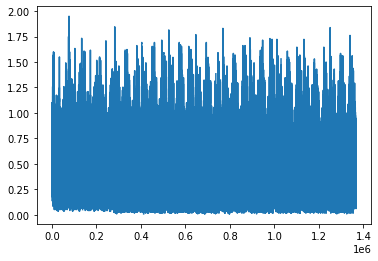

In [92]:
windspeed.plot(x=time)

In [ ]:
# convert the error to logical values and see correlation plot ...?